<a href="https://colab.research.google.com/github/Pontes-y/fiap/blob/main/fiap_ano2_fase_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.covariance import EmpiricalCovariance, MinCovDet

# lista com os arquivos a serem analisados
arquivos = ['/content/vendas_linha_petshop_2019 - vendas_linha_petshop_2019.csv',
            '/content/vendas_linha_petshop_2020 - vendas_linha_petshop_2020.csv',
            '/content/vendas_linha_petshop_2021 - vendas_linha_petshop_2021.csv',
            '/content/vendas_linha_petshop_2022 - vendas_linha_petshop_2022.csv']

df_list = []

for arquivo in arquivos:
  df_list.append(pd.read_csv(arquivo))

df = pd.concat(df_list, ignore_index=True)

print(df)

        cod_pedido regiao_pais                              produto  valor  \
0                1       Norte         Biscoito  True Champion 300g     22   
1                2       Norte         Biscoito  True Champion 300g     21   
2                3       Norte         Biscoito  True Champion 300g     22   
3                4       Norte         Biscoito  True Champion 300g     19   
4                5       Norte         Biscoito  True Champion 300g     22   
...            ...         ...                                  ...    ...   
200781      200976     Sudeste  Bandana Disney Mickey Fábrica Petti  19,44   
200782      200977     Sudeste  Bandana Disney Mickey Fábrica Petti  21,06   
200783      200978         Sul  Bandana Disney Mickey Fábrica Petti  14,58   
200784      200979         Sul  Bandana Disney Mickey Fábrica Petti   16,2   
200785      200980         Sul  Bandana Disney Mickey Fábrica Petti  14,58   

        quantidade valor_total_bruto        data             es

In [95]:
print(df.dtypes)

cod_pedido               int64
regiao_pais             object
produto                 object
valor                   object
quantidade             float64
valor_total_bruto       object
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao          object
lucro_liquido           object
categoriaprod           object
dtype: object


In [96]:
# 1.4.3 Tratando os dados nas colunas de valores
# corrigindo a coluna de data para o formato padrao YYYY-MM-DD
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

# corrigindo tipo de dado object para float
colunas_para_float = ['valor', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido']
for coluna in colunas_para_float:
  df[coluna] = df[coluna].str.replace(',', '.').astype(float)

In [97]:
# 1.4.1 Identificando dados missing
missings_por_linha = pd.DataFrame({'cod_pedido':df['cod_pedido'].tolist(), 'n_missing':df.isna().sum(axis=1).tolist()})
n_colunas = df.shape[1] - 1
missings_por_linha.assign(perc_missings = missings_por_linha['n_missing'] / n_colunas).sort_values('perc_missings', ascending=False).head(10)

,cod_pedido,n_missing,perc_missings
30611,30612,3,0.230769
24052,24053,3,0.230769
1180,1181,3,0.230769
46939,46940,3,0.230769
47342,47343,3,0.230769
14891,14892,3,0.230769
2141,2142,3,0.230769
47435,47436,3,0.230769
40966,40967,3,0.230769
47218,47219,3,0.230769


In [98]:
# 1.4.1 Identificando dados missing
missings_por_coluna = df.isna().sum()
missings_por_coluna = pd.DataFrame(missings_por_coluna, columns=['n'])
n_linhas = df.shape[0]
missings_por_coluna.assign(perc_missings = missings_por_coluna['n'] / n_linhas).sort_values('n', ascending=False)

,n,perc_missings
valor,50283,0.250431
valor_total_bruto,50283,0.250431
quantidade,667,0.003322
cod_pedido,0,0.000000
regiao_pais,0,0.000000
produto,0,0.000000
data,0,0.000000
estado,0,0.000000
formapagto,0,0.000000
centro_distribuicao,0,0.000000


In [99]:
# 1.4.1 Tratando os dados missing
df[['valor', 'quantidade']].corr()
df[['valor', 'quantidade']].fillna(0).corr()

,valor,quantidade
valor,1.000000,-0.018212
quantidade,-0.018212,1.000000


In [100]:
# 1.4.1 Tratando os dados missing
df.dropna().shape

(149991, 14)

In [101]:
print(df)

        cod_pedido regiao_pais                              produto  valor  \
0                1       Norte         Biscoito  True Champion 300g    NaN   
1                2       Norte         Biscoito  True Champion 300g    NaN   
2                3       Norte         Biscoito  True Champion 300g    NaN   
3                4       Norte         Biscoito  True Champion 300g    NaN   
4                5       Norte         Biscoito  True Champion 300g    NaN   
...            ...         ...                                  ...    ...   
200781      200976     Sudeste  Bandana Disney Mickey Fábrica Petti  19.44   
200782      200977     Sudeste  Bandana Disney Mickey Fábrica Petti  21.06   
200783      200978         Sul  Bandana Disney Mickey Fábrica Petti  14.58   
200784      200979         Sul  Bandana Disney Mickey Fábrica Petti  16.20   
200785      200980         Sul  Bandana Disney Mickey Fábrica Petti  14.58   

        quantidade  valor_total_bruto       data             es

<Axes: xlabel='quantidade', ylabel='valor'>

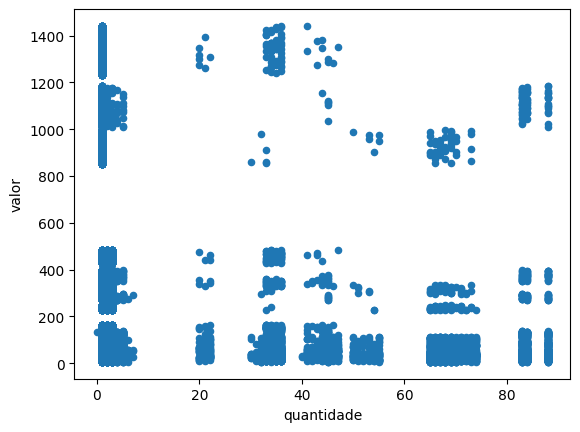

In [91]:
# 1.4.2 Analise dos outiliers nas colunas quantidade e valor, pelo metodo scatterplot
df.plot.scatter(x='quantidade', y='valor')

<Axes: xlabel='quantidade', ylabel='valor_total_bruto'>

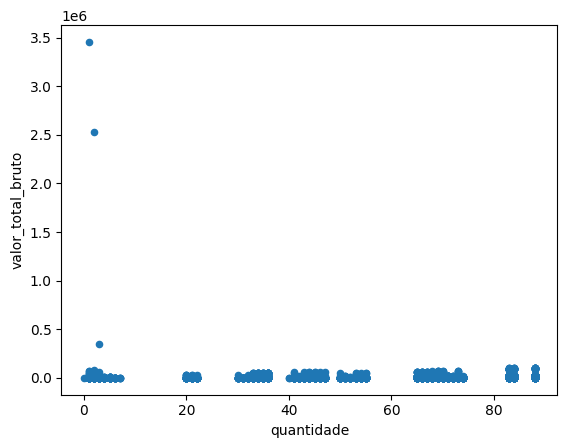

In [92]:
# 1.4.2 Analise dos outiliers na coluna quantidade pelo metodo scatterplot
df.plot.scatter(x='quantidade', y='valor_total_bruto')